# Regularized Linear Models

A good model generalized well. The generalization error can be summarized as the sum of bias error, variance error, and irreducible error. A **high-bias model** is usually the result of a model that misses important information and thus underfits while a **high-variance model** is too sensitive, thus has high variance and overfits the training data. 

There is a **trade-off between bias and variance** since reducing the model complexity reduces variance but increases bias. The **irreducible error**, however, is the result not of the model but noisy data and can be reduced by cleaning up the data.

**Regularization** is a way to reduce overfitting by constraining the weights of a linear model.

### 1. Ridge Regression (Tikhonov Regularization)

### 2. Lasso Regression

### 3. Elastic Net

### 4. Application Examples

# 1. Ridge Regression (Tikhonov Regularization)

During training the model, a regularization term is added to the cost function which keeps the weights as small as possible (thus preventing overfitting). This adapted cost function is called **ridge regression cost function**.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
R2 score: 0.47


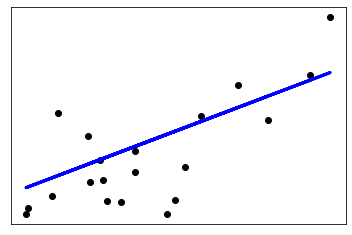

In [15]:
# Linear Regression Model
# adapted from scikit-learn example website https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [935.32292342  99.66616842]
Mean squared error: 2540.66
R2 score: 0.47


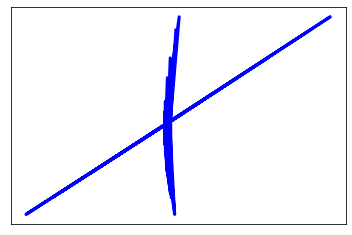

In [18]:
# Polynomial Regression

# polynomially transforming the data first

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

diabetes_X_train_poly = poly_features.fit_transform(diabetes_X_train)
diabetes_X_test_poly = poly_features.fit_transform(diabetes_X_test)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train_poly, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred_poly = regr.predict(diabetes_X_test_poly)

'''print(len(diabetes_X_train))
print(len(diabetes_X_train_poly))
print(len(diabetes_y_train))

print(len(diabetes_X_test))
print(len(diabetes_X_test_poly))
print(len(diabetes_y_test))
print(len(diabetes_y_pred))
print(len(diabetes_y_pred_poly))'''


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred_poly))
# The coefficient of determination: 1 is perfect prediction
print('R2 score: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred_poly))

# Plot outputs
#plt.scatter(diabetes_X_test_poly, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test_poly, diabetes_y_pred_poly, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [935.32292342  99.66616842]
Mean squared error: 3604.27
R2 score: 0.25


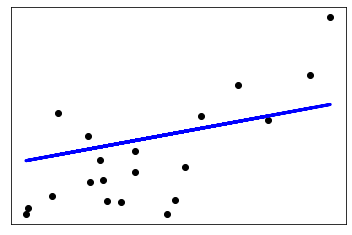

In [12]:
# Ridge regression with Stochastic Gradient Descent

from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")

ridge_reg.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = ridge_reg.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


